In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163327 sha256=954d807f57c4762022b8d020c04432e989e2bb28de1d5f7529df539a12b13c3d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [1]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, NMF
# from google.colab import files
# uploaded = files.upload()
# import io
# df1=pd.read_csv(io.BytesIO(uploaded['Processed_Book_Data_shortened.csv']))
df=pd.read_csv('Processed_Book_Data_shortened.csv')
df.head()

,0,user_id,isbn,rating,book_title,book_author,publisher,img_s,Summary,Language,Category
0,0,2,195153448,0,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science']
1,1,8,2005018,5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
2,2,11400,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
3,3,11676,2005018,8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']
4,4,41385,2005018,0,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses']


In [2]:
df.shape

(258879, 11)

In [3]:
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
reader = Reader()
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)
train, test = train_test_split(data, test_size=0.25, random_state=1)

Trying different number of factors to see if this parameter affects the performance of the model.  
The default number of factors is 100, hence we will tweak the number of factors from 1-100 to evaluate the performance.

In [4]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
nmf_dict = defaultdict(dict)
for i in range(100):
    nmf = NMF(n_factors=i+1)
    start_time = time.time()
    nmf.fit(train)
    fit_time = time.time() - start_time
    predictions = nmf.test(test)
    nmf_dict[i+1]['rmse'] = rmse(predictions)
    nmf_dict[i+1]['fit_time'] = fit_time
    nmf_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

RMSE: 3.7903
RMSE: 3.8226
RMSE: 3.8280
RMSE: 3.8531
RMSE: 3.8637
RMSE: 3.8711
RMSE: 3.8708
RMSE: 3.8707
RMSE: 3.8794
RMSE: 3.8789
RMSE: 3.8935
RMSE: 3.8830
RMSE: 3.8868
RMSE: 3.8897
RMSE: 3.8826
RMSE: 3.8884
RMSE: 3.8842
RMSE: 3.8886
RMSE: 3.8854
RMSE: 3.8787
RMSE: 3.8914
RMSE: 3.8920
RMSE: 3.8905
RMSE: 3.8832
RMSE: 3.8892
RMSE: 3.8858
RMSE: 3.8885
RMSE: 3.8781
RMSE: 3.8815
RMSE: 3.8902
RMSE: 3.8815
RMSE: 3.8783
RMSE: 3.8860
RMSE: 3.8750
RMSE: 3.8802
RMSE: 3.8770
RMSE: 3.8765
RMSE: 3.8710
RMSE: 3.8840
RMSE: 3.8737
RMSE: 3.8769
RMSE: 3.8785
RMSE: 3.8719
RMSE: 3.8740
RMSE: 3.8778
RMSE: 3.8735
RMSE: 3.8741
RMSE: 3.8709
RMSE: 3.8744
RMSE: 3.8758
RMSE: 3.8699
RMSE: 3.8727
RMSE: 3.8657
RMSE: 3.8721
RMSE: 3.8688
RMSE: 3.8668
RMSE: 3.8681
RMSE: 3.8701
RMSE: 3.8575
RMSE: 3.8694
RMSE: 3.8722
RMSE: 3.8627
RMSE: 3.8673
RMSE: 3.8653
RMSE: 3.8650
RMSE: 3.8556
RMSE: 3.8572
RMSE: 3.8559
RMSE: 3.8585
RMSE: 3.8662
RMSE: 3.8612
RMSE: 3.8541
RMSE: 3.8553
RMSE: 3.8574
RMSE: 3.8618
RMSE: 3.8594
RMSE: 3.8565

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
rmse,3.790332,3.822590,3.827980,3.853062,3.863668,3.871146,3.870766,3.870672,3.879436,3.878931,...,3.851473,3.849121,3.842541,3.841737,3.844768,3.843986,3.843678,3.844418,3.845236,3.841313
fit_time,3.352605,3.478688,3.628748,3.711559,3.681652,3.970428,3.899751,3.712970,3.914358,4.002653,...,11.492779,11.624100,11.579876,11.682428,11.896491,11.859138,11.916511,12.031492,12.198453,12.276008
prediction_time,0.303891,0.375871,0.337357,0.315964,0.334065,0.365205,0.367297,0.317363,0.311141,0.251704,...,0.310192,0.315799,0.301280,0.310378,0.314785,0.322676,0.304817,0.309650,0.233182,0.309263


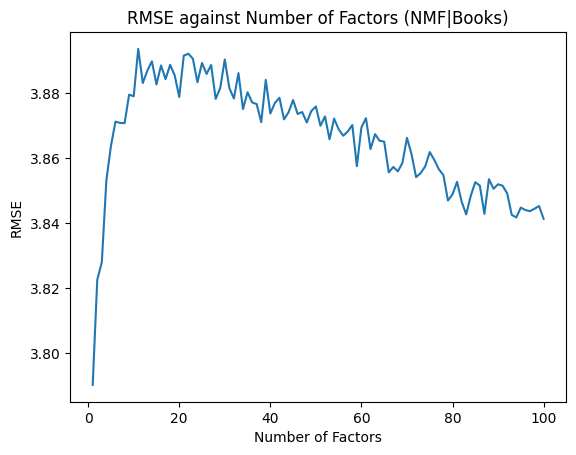

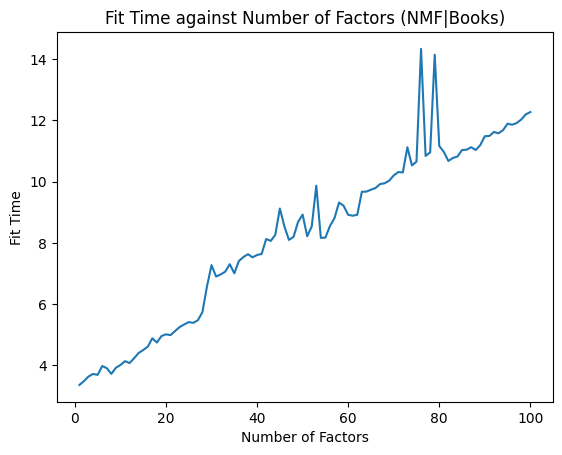

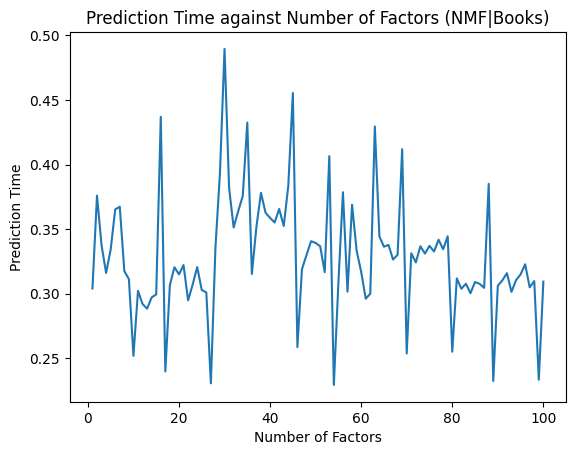

In [5]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(nmf_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors (NMF|Books)')
plt.show()

plt.plot(nmf_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors (NMF|Books)')
plt.show()

plt.plot(nmf_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors (NMF|Books)')
plt.show()


In [10]:
import time
from collections import defaultdict

# A dictionary to store the rsme, fit time and prediction time 
nmf_dict = defaultdict(dict)
for i in range(500):
    nmf = NMF(n_factors=i+1)
    start_time = time.time()
    nmf.fit(train)
    fit_time = time.time() - start_time
    predictions = nmf.test(test)
    nmf_dict[i+1]['rmse'] = rmse(predictions)
    nmf_dict[i+1]['fit_time'] = fit_time
    nmf_dict[i+1]['prediction_time'] = time.time() - start_time - fit_time

# A dataframe to store the results
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

RMSE: 3.7907
RMSE: 3.8143
RMSE: 3.8304
RMSE: 3.8472
RMSE: 3.8625
RMSE: 3.8582
RMSE: 3.8729
RMSE: 3.8802
RMSE: 3.8752
RMSE: 3.8800
RMSE: 3.8783
RMSE: 3.8831
RMSE: 3.8851
RMSE: 3.8861
RMSE: 3.8908
RMSE: 3.8902
RMSE: 3.8863
RMSE: 3.8949
RMSE: 3.8865
RMSE: 3.8929
RMSE: 3.8837
RMSE: 3.8824
RMSE: 3.8835
RMSE: 3.8789
RMSE: 3.8886
RMSE: 3.8828
RMSE: 3.8833
RMSE: 3.8876
RMSE: 3.8830
RMSE: 3.8769
RMSE: 3.8843
RMSE: 3.8772
RMSE: 3.8841
RMSE: 3.8713
RMSE: 3.8768
RMSE: 3.8807
RMSE: 3.8792
RMSE: 3.8785
RMSE: 3.8782
RMSE: 3.8804
RMSE: 3.8762
RMSE: 3.8704
RMSE: 3.8779
RMSE: 3.8741
RMSE: 3.8773
RMSE: 3.8705
RMSE: 3.8746
RMSE: 3.8719
RMSE: 3.8741
RMSE: 3.8744
RMSE: 3.8674
RMSE: 3.8641
RMSE: 3.8615
RMSE: 3.8630
RMSE: 3.8748
RMSE: 3.8631
RMSE: 3.8598
RMSE: 3.8657
RMSE: 3.8714
RMSE: 3.8613
RMSE: 3.8640
RMSE: 3.8629
RMSE: 3.8615
RMSE: 3.8594
RMSE: 3.8696
RMSE: 3.8591
RMSE: 3.8576
RMSE: 3.8580
RMSE: 3.8606
RMSE: 3.8625
RMSE: 3.8577
RMSE: 3.8570
RMSE: 3.8528
RMSE: 3.8517
RMSE: 3.8528
RMSE: 3.8579
RMSE: 3.8558

KeyboardInterrupt: 

In [11]:
nmf_df = pd.DataFrame(nmf_dict)
nmf_df

,1,2,3,4,5,6,7,8,9,10,...,234,235,236,237,238,239,240,241,242,243
rmse,3.790691,3.814290,3.830446,3.847169,3.862498,3.858230,3.872851,3.880214,3.875150,3.880014,...,3.807098,3.810085,3.807806,3.807141,3.809379,3.807839,3.808711,3.808422,3.807165,3.810383
fit_time,3.761539,3.515282,3.531628,3.626230,3.746892,3.882338,3.933692,4.007032,4.161844,4.268557,...,27.305645,28.000327,27.700152,26.960145,26.840990,26.887972,28.341439,29.972535,27.136147,26.731443
prediction_time,0.333208,0.453055,0.338843,0.337834,0.355216,0.242984,0.330430,0.334045,0.318173,0.332522,...,0.359648,0.513742,0.362229,0.300467,0.359931,0.405553,0.606300,0.367783,0.354461,0.325508


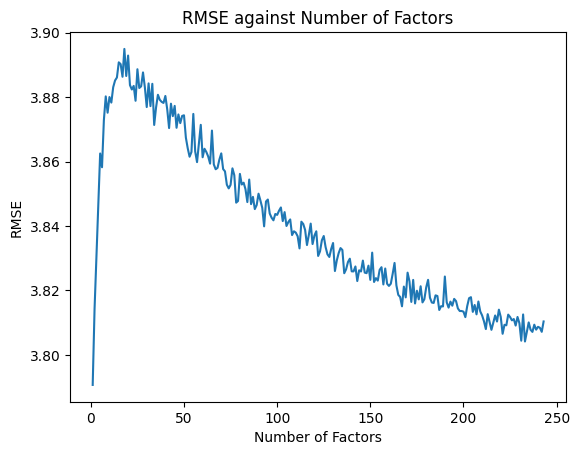

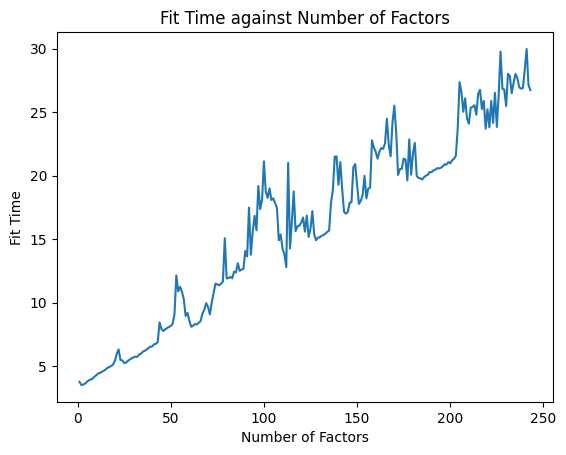

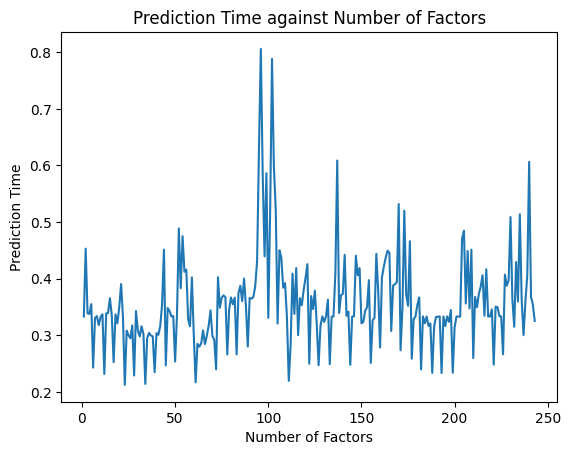

In [12]:
# Plot the RMSE, fit time and prediction time against the number of factors
import matplotlib.pyplot as plt
plt.plot(nmf_df.loc['rmse'])
plt.xlabel('Number of Factors')
plt.ylabel('RMSE')
plt.title('RMSE against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['fit_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Fit Time')
plt.title('Fit Time against Number of Factors')
plt.show()

plt.plot(nmf_df.loc['prediction_time'])
plt.xlabel('Number of Factors')
plt.ylabel('Prediction Time')
plt.title('Prediction Time against Number of Factors')
plt.show()


We will be using the default parameters set in the NMF for our comparison between the different algorithms.

In [6]:
import time
nmf = NMF()
begin_fit = time.time()
nmf.fit(train)
end_fit = time.time()
begin_predict = time.time()
nmf.test(test)
end_predict = time.time()
result = rmse(nmf.test(test))
row = {"Algorithm":"NMF","Fit Time":end_fit-begin_fit,"Prediction Time":end_predict-begin_predict}
print(row)

RMSE: 3.8835
{'Algorithm': 'NMF', 'Fit Time': 4.940197467803955, 'Prediction Time': 0.5471689701080322}


In [7]:
testdf = pd.DataFrame(test)
testdf = testdf.rename(columns={
    0: "User-ID",
    1: "isbn",
    2: "Actual Rating"
})
testdf["Predicted Rating"] = -1
testdf["Error"] = -1
for index, row in testdf.iterrows():
  testdf.loc[index, 'Predicted Rating'] = nmf.predict(row["User-ID"], row["isbn"], row["Actual Rating"]).est
for index, row in testdf.iterrows():
  testdf.loc[index, 'Error'] = '{:.2f}'.format(abs(row["Predicted Rating"] - row["Actual Rating"]))

testdf

,User-ID,isbn,Actual Rating,Predicted Rating,Error
0,35609,8420636282,9.0,3.137990,5.86
1,30711,449221482,8.0,1.000000,7.00
2,266866,006052779X,0.0,3.137990,3.14
3,265115,446605239,0.0,1.944524,1.94
4,189835,440498058,5.0,3.869903,1.13
...,...,...,...,...,...
64715,265784,836221192,0.0,1.965710,1.97
64716,117937,553582747,0.0,3.137990,3.14
64717,114988,142002267,0.0,5.000000,5.00
64718,187145,399150897,0.0,2.451024,2.45


In [8]:
worst_predictions = testdf.sort_values(by='Error',ascending=False)[:50]
best_predictions = testdf.sort_values(by='Error',ascending=False)[-50:]

best_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
48030,70666,345378482,5.0,5.00000,0.00
37823,44852,1559703237,5.0,5.00000,0.00
53381,11676,60652934,5.0,5.00000,0.00
59328,276231,671000306,5.0,5.00000,0.00
56940,104243,399143947,5.0,5.00000,0.00
48109,189835,425104338,5.0,4.99715,0.00
30880,123544,553280414,5.0,5.00000,0.00
30884,55187,440213290,5.0,5.00000,0.00
53354,72347,971880107,1.0,1.00000,0.00
5206,209625,345370775,5.0,5.00000,0.00


In [9]:
worst_predictions

,User-ID,isbn,Actual Rating,Predicted Rating,Error
54198,69775,425153975,10.0,1.0,9.00
3131,93562,446613266,10.0,1.0,9.00
54438,2891,571169341,10.0,1.0,9.00
24512,4385,084394272X,10.0,1.0,9.00
31953,41058,446609323,10.0,1.0,9.00
18136,36836,345334531,10.0,1.0,9.00
24470,753,679420118,10.0,1.0,9.00
18150,232131,671003755,10.0,1.0,9.00
61566,197659,039447970X,10.0,1.0,9.00
46165,81045,312995423,10.0,1.0,9.00
